# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Create url and unit for API call
url = ' http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'
# query url
qurl = f'{url}&appid={weather_api_key}&units={units}&q='
# Preview the dataset to see dictionaries
data = requests.get(qurl + city).json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -0.7193, 'lon': 8.7815},
 'dt': 1632273908,
 'id': 2396518,
 'main': {'feels_like': 78.87,
          'grnd_level': 1012,
          'humidity': 81,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 77.61,
          'temp_max': 77.61,
          'temp_min': 77.61},
 'name': 'Port-Gentil',
 'sys': {'country': 'GA', 'sunrise': 1632287658, 'sunset': 1632331255},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 180, 'gust': 15.26, 'speed': 13.2}}


In [5]:
# Create empty lists for data storing
city_list = []
country = []
lat = []
lng = []
date = []
clouds = []
temp_max = []
humidity = []
wind_speed = []
# Set record counters
i = 1

In [6]:
# Perform API calls to check weather on each city
# Loop through data set using Try and Except
print("Beginning Data Retrieval")
print("-----------------------------")

for x in cities: 
    try:
        data = requests.get(qurl + x).json()
        city_list.append(data['name'])
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])  
        lng.append(data['coord']['lon'])
        date.append(data['dt'])
        clouds.append(data['clouds']['all'])
        temp_max.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        wind_speed.append(data['wind']['speed'])
        print(f'Processing Record {i} of Set {i} | {x}')
        i += 1
    except (KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 2 | butaritari
Processing Record 3 of Set 3 | rikitea
Processing Record 4 of Set 4 | bluff
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 6 | northam
Processing Record 7 of Set 7 | vallenar
Processing Record 8 of Set 8 | hasaki
Processing Record 9 of Set 9 | westport
Processing Record 10 of Set 10 | hirara
Processing Record 11 of Set 11 | busselton
Processing Record 12 of Set 12 | flin flon
City not found. Skipping...
City not found. Skipping...
Processing Record 13 of Set 13 | morondava
Processing Record 14 of Set 14 | san severino marche
Processing Record 15 of Set 15 | kiruna
Processing Record 16 of Set 16 | mataura
Processing Record 17 of Set 17 | tefe
Processing Record 18 of Set 18 | port blair
Processing Record 19 of Set 19 | hermanus
Processing Record 20 of Set 20 | havre-saint-pierre
Processing Record 21 of Set 21 | khandbari
Processing Rec

Processing Record 179 of Set 179 | ixtapa
Processing Record 180 of Set 180 | chokurdakh
Processing Record 181 of Set 181 | port lincoln
Processing Record 182 of Set 182 | olafsvik
Processing Record 183 of Set 183 | nikolskoye
Processing Record 184 of Set 184 | torbay
Processing Record 185 of Set 185 | ponta do sol
Processing Record 186 of Set 186 | ayan
Processing Record 187 of Set 187 | durres
Processing Record 188 of Set 188 | khani
Processing Record 189 of Set 189 | teahupoo
Processing Record 190 of Set 190 | severo-kurilsk
Processing Record 191 of Set 191 | carutapera
Processing Record 192 of Set 192 | sile
City not found. Skipping...
Processing Record 193 of Set 193 | kasulu
Processing Record 194 of Set 194 | upernavik
Processing Record 195 of Set 195 | santa maria
Processing Record 196 of Set 196 | saint-pierre
Processing Record 197 of Set 197 | constitucion
City not found. Skipping...
Processing Record 198 of Set 198 | lavrentiya
Processing Record 199 of Set 199 | shakiso
Proces

Processing Record 354 of Set 354 | paka
Processing Record 355 of Set 355 | onguday
Processing Record 356 of Set 356 | ponta delgada
Processing Record 357 of Set 357 | aiken
City not found. Skipping...
Processing Record 358 of Set 358 | pouembout
Processing Record 359 of Set 359 | byron bay
Processing Record 360 of Set 360 | neiafu
Processing Record 361 of Set 361 | anchorage
Processing Record 362 of Set 362 | nisia floresta
City not found. Skipping...
Processing Record 363 of Set 363 | verkhnevilyuysk
Processing Record 364 of Set 364 | wekiva springs
City not found. Skipping...
Processing Record 365 of Set 365 | manaus
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 366 of Set 366 | mirnyy
Processing Record 367 of Set 367 | chengam
Processing Record 368 of Set 368 | bosaso
Processing Record 369 of Set 369 | merauke
Processing Record 370 of Set 370 | kurikka
Processing Record 371 of Set 371 | bandarbeyla
City not found. Skipping...
P

Processing Record 531 of Set 531 | nueva gorgona
Processing Record 532 of Set 532 | cusuna
Processing Record 533 of Set 533 | lebanon
Processing Record 534 of Set 534 | berezovyy
City not found. Skipping...
Processing Record 535 of Set 535 | tari
Processing Record 536 of Set 536 | buin
Processing Record 537 of Set 537 | basco
Processing Record 538 of Set 538 | lakes entrance
City not found. Skipping...
Processing Record 539 of Set 539 | ada
Processing Record 540 of Set 540 | ler
Processing Record 541 of Set 541 | astara
Processing Record 542 of Set 542 | opuwo
Processing Record 543 of Set 543 | chunskiy
Processing Record 544 of Set 544 | sungaipenuh
Processing Record 545 of Set 545 | tondi
Processing Record 546 of Set 546 | clyde river
Processing Record 547 of Set 547 | aragats
Processing Record 548 of Set 548 | avera
Processing Record 549 of Set 549 | srednyaya yelyuzan
Processing Record 550 of Set 550 | la cruz
Processing Record 551 of Set 551 | yaroslavl
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create dataframe from lists
df = pd.DataFrame({'City' : city_list, 
                    'Country' : country,
                    'Lat' : lat,
                    'Lng' : lng,
                    'Date' : date,
                    'Cloudiness' : clouds,
                    'Max. Temp.' : temp_max,
                    'Humidity' : humidity,
                    'Wind Speed' : wind_speed})
# Export the city data into a .csv
df.to_csv('../output_data/CityWeather.csv')
# Display the DataFrame
df.head()

,City,Country,Lat,Lng,Date,Cloudiness,Max. Temp.,Humidity,Wind Speed
0,Kapaa,US,22.0752,-159.3190,1632273909,75,84.18,71,3.0
1,Butaritari,KI,3.0707,172.7902,1632273910,56,83.12,70,11.5
2,Rikitea,PF,-23.1203,-134.9692,1632273791,0,74.28,70,13.6
3,Bluff,NZ,-46.6000,168.3333,1632273911,15,53.80,62,19.3
4,Jamestown,US,42.0970,-79.2353,1632273830,90,68.07,86,7.0


In [8]:
# Perform statistical summary using describe method
df.describe()

,Lat,Lng,Date,Cloudiness,Max. Temp.,Humidity,Wind Speed
count,554.000000,554.000000,5.540000e+02,554.000000,554.000000,554.000000,554.000000
mean,20.698936,15.498068,1.632274e+09,56.310469,64.580415,71.041516,7.858682
std,32.725248,88.635413,1.306462e+02,40.663631,16.737908,20.557248,5.700695
min,-54.800000,-175.200000,1.632274e+09,0.000000,10.540000,7.000000,0.000000
25%,-5.195000,-61.831900,1.632274e+09,10.000000,52.502500,62.000000,3.650000
50%,25.822250,20.453500,1.632274e+09,71.500000,68.915000,76.500000,6.620000
75%,47.920850,92.380500,1.632274e+09,99.000000,78.300000,85.000000,10.360000
max,78.218600,179.316700,1.632274e+09,100.000000,97.070000,100.000000,35.700000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Check max. humidity 
df['Humidity'].max()

100

In [10]:
# There are no citis that have humidity more than 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

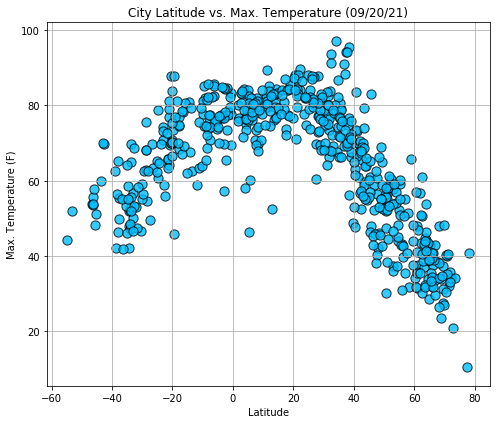

In [11]:
# Create scatter plot between latitude and max. temperature
fig1 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Max. Temp.',
                    title = 'City Latitude vs. Max. Temperature (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    grid = True,
                   ylim = (min(df['Max. Temp.']) - 5, max(df['Max. Temp.'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
plt.savefig('../output_data/Lat_TempMax.png')

## Latitude vs. Humidity Plot

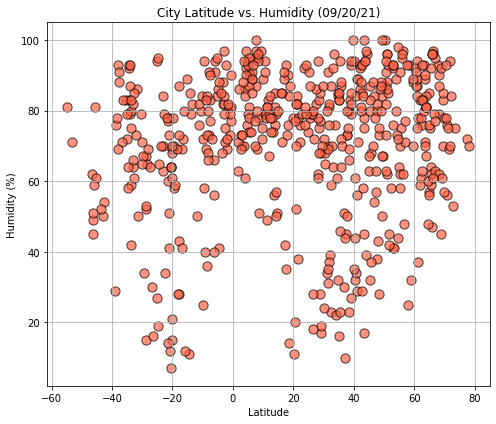

In [12]:
# Create scatter plot between latitude and humidity
fig2 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Humidity',
                    title = 'City Latitude vs. Humidity (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Humidity']) - 5, max(df['Humidity'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_Humidity.png')

## Latitude vs. Cloudiness Plot

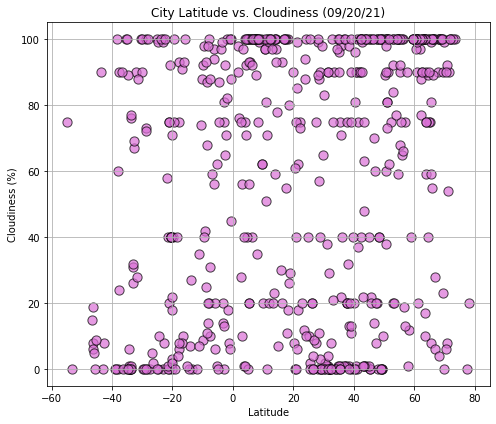

In [13]:
# Create scatter plot between latitude and cloudiness
fig3 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Cloudiness',
                    title = 'City Latitude vs. Cloudiness (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Cloudiness']) - 5, max(df['Cloudiness'] + 5)))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_Cloudiness.png')

## Latitude vs. Wind Speed Plot

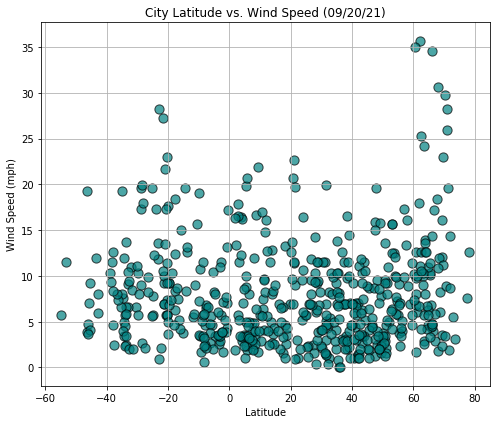

In [14]:
# Create scatter plot between latitude and wind speed
fig4 = df.plot(kind= 'scatter',
                    x ='Lat',
                    y = 'Wind Speed',
                    title = 'City Latitude vs. Wind Speed (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.7,
                    grid = True,
                   ylim = (min(df['Wind Speed']) - 2, max(df['Wind Speed'] + 2)))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('../output_data/Lat_WindSpeed.png')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Determine Northern Hemisphere and Southern Hemisphere
lat_north = df[df['Lat'] >= 0]
lat_south = df[df['Lat'] <= 0]

The r-value is: -0.8275977718393716


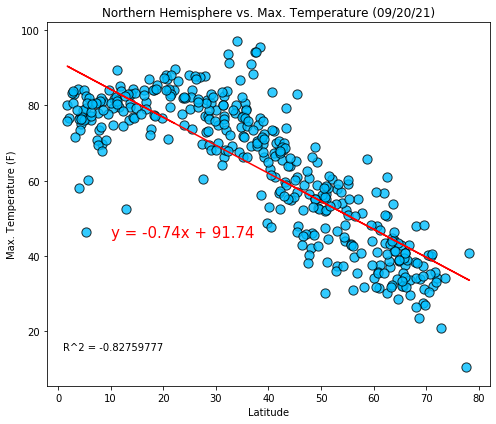

In [16]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Max. Temp.'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Max. Temp.',
                    title = 'Northern Hemisphere vs. Max. Temperature (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Max. Temp.']) - 5, max(lat_north['Max. Temp.'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (10, 45), fontsize = 15, color = "red")
plt.text(1, 15, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_TempMax_Reg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7401411695491877


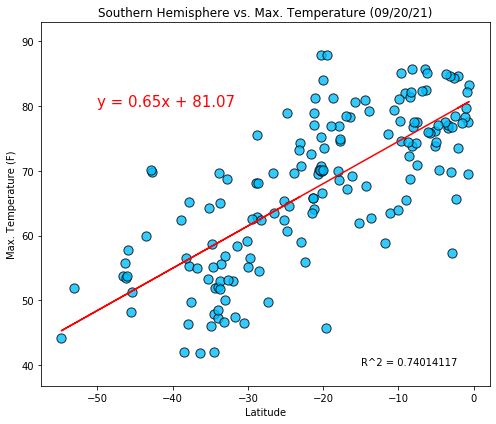

In [17]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Max. Temp.'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Max. Temp.',
                    title = 'Southern Hemisphere vs. Max. Temperature (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'deepskyblue',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Max. Temp.']) - 5, max(lat_south['Max. Temp.'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-50, 80), fontsize = 15, color = "red")
plt.text(-15, 40, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_TempMax_Reg.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.03366148998086509


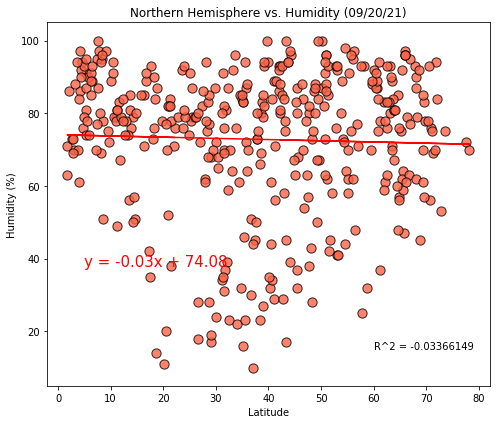

In [18]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Humidity'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Humidity',
                    title = 'Northern Hemisphere vs. Humidity (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Humidity']) - 5, max(lat_north['Humidity'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (5, 38), fontsize = 15, color = "red")
plt.text(60, 15, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Humid_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14508492896462288


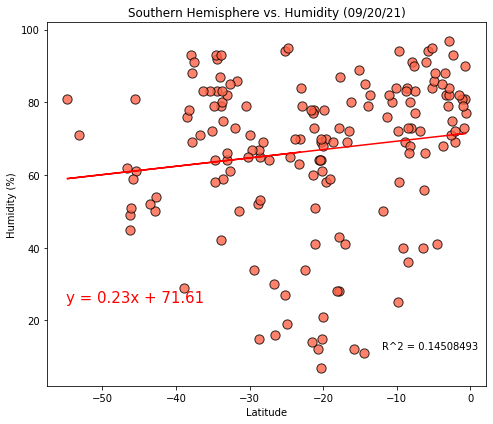

In [19]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Humidity'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Humidity',
                    title = 'Southern Hemisphere vs. Humidity (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'tomato',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Humidity']) - 5, max(lat_south['Humidity'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-55, 25), fontsize = 15, color = "red")
plt.text(-12, 12, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Humid_Reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09483065947182182


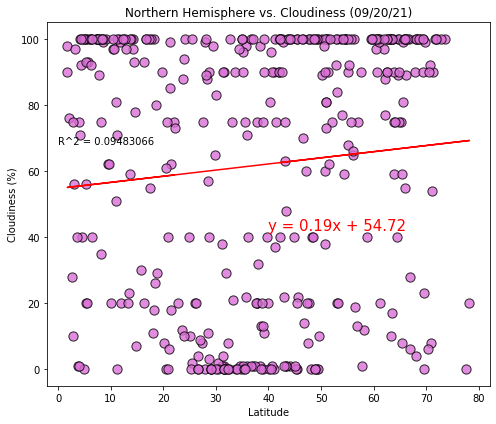

In [20]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Cloudiness'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Cloudiness',
                    title = 'Northern Hemisphere vs. Cloudiness (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Cloudiness']) - 5, max(lat_north['Cloudiness'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (40, 42), fontsize = 15, color = "red")
plt.text(0, 68, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Cloud_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1965713129331062


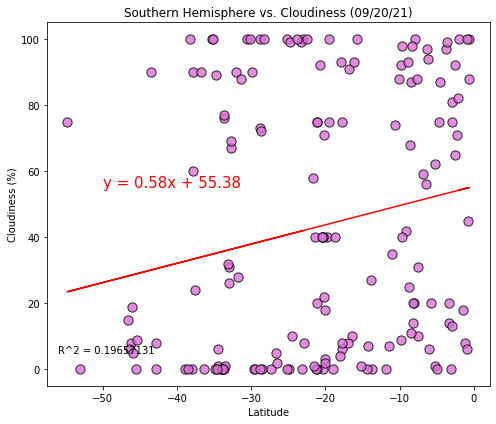

In [21]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Cloudiness'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Cloudiness',
                    title = 'Southern Hemisphere vs. Cloudiness (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'orchid',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Cloudiness']) - 5, max(lat_south['Cloudiness'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-50, 55), fontsize = 15, color = "red")
plt.text(-56, 5, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Cloud_Reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17223512889035658


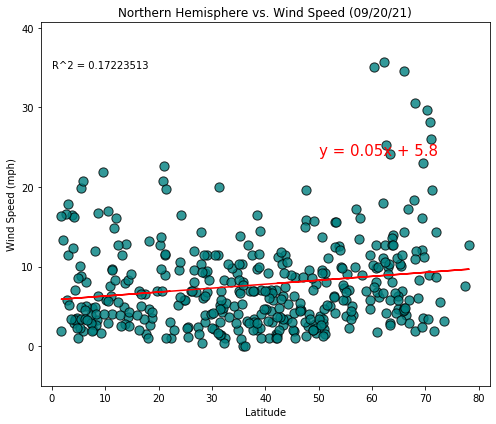

In [22]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_north['Lat'], lat_north['Wind Speed'])
regress = lat_north['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_north.plot(kind= 'scatter',x = 'Lat', y = 'Wind Speed',
                    title = 'Northern Hemisphere vs. Wind Speed (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_north['Wind Speed'] - 5), max(lat_north['Wind Speed'] + 5)))
plt.plot(lat_north['Lat'], regress, "r-")
plt.annotate(line_eq, (50, 24), fontsize = 15, color = "red")
plt.text(0, 35, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/NLat_Wind_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13722115350840822


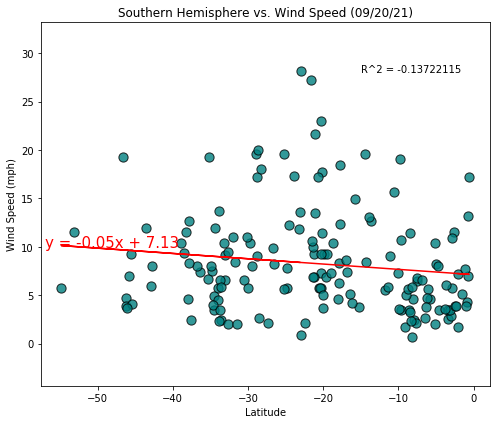

In [23]:
# linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(lat_south['Lat'], lat_south['Wind Speed'])
regress = lat_south['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

lat_south.plot(kind= 'scatter',x = 'Lat', y = 'Wind Speed',
                    title = 'Southern Hemisphere vs. Wind Speed (09/20/21)',
                    figsize = (7, 6),
                    s = 85,
                    color = 'teal',
                    edgecolor = 'black',
                    marker ="o",
                    alpha = 0.8,
                    ylim = (min(lat_south['Wind Speed'] - 5), max(lat_south['Wind Speed'] + 5)))
plt.plot(lat_south['Lat'], regress, "r-")
plt.annotate(line_eq, (-57, 10), fontsize = 15, color = "red")
plt.text(-15, 28, 'R^2 = %0.8f' % rvalue)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('../output_data/SLat_Wind_Reg.png')